In [1]:
# !pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error,mean_squared_log_error
from string import digits
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# from prophet import Prophet

In [2]:
df_saham = pd.read_csv('data/BBCA.JK.csv')
df_saham

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-01,6215.0,6270.0,6155.0,6225.0,6026.060547,112286000
1,2021-04-05,6250.0,6290.0,6155.0,6155.0,5958.297852,73311500
2,2021-04-06,6135.0,6170.0,6080.0,6165.0,5967.978027,80215000
3,2021-04-07,6155.0,6275.0,6135.0,6250.0,6050.261719,107908000
4,2021-04-08,6200.0,6215.0,6125.0,6135.0,6022.187500,123697500
...,...,...,...,...,...,...,...
243,2022-03-28,7825.0,7900.0,7800.0,7900.0,7900.000000,83911500
244,2022-03-29,7875.0,7900.0,7825.0,7850.0,7850.000000,62180600
245,2022-03-30,7900.0,7900.0,7825.0,7875.0,7875.000000,71430600
246,2022-03-31,7925.0,8000.0,7875.0,7975.0,7975.000000,112691900


In [5]:
df_saham[-90:-60]

,Date,Open,High,Low,Close,Adj Close,Volume
158,2021-11-23,7400.0,7500.0,7400.0,7475.0,7362.169922,43477500
159,2021-11-24,7575.0,7575.0,7425.0,7475.0,7362.169922,35181400
160,2021-11-25,7450.0,7525.0,7425.0,7425.0,7312.924316,40216100
161,2021-11-26,7400.0,7450.0,7250.0,7275.0,7165.188477,113288400
162,2021-11-29,7275.0,7425.0,7175.0,7400.0,7288.301758,87907900
163,2021-11-30,7325.0,7425.0,7275.0,7275.0,7165.188477,144923700
164,2021-12-01,7275.0,7450.0,7275.0,7300.0,7189.811523,76538100
165,2021-12-02,7375.0,7500.0,7300.0,7500.0,7386.792480,66831000
166,2021-12-03,7525.0,7525.0,7350.0,7375.0,7263.679199,63283700
167,2021-12-06,7450.0,7475.0,7350.0,7350.0,7239.056641,56944100


In [3]:
df_saham['Date'] = pd.to_datetime(df_saham['Date'])
df_saham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       248 non-null    datetime64[ns]
 1   Open       248 non-null    float64       
 2   High       248 non-null    float64       
 3   Low        248 non-null    float64       
 4   Close      248 non-null    float64       
 5   Adj Close  248 non-null    float64       
 6   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.7 KB


In [4]:
df_date = pd.DataFrame({
    'Date' : pd.date_range(start="2022-01-01",periods=91)
})
df_date

,Date
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
...,...
86,2022-03-28
87,2022-03-29
88,2022-03-30
89,2022-03-31


In [5]:
new_df = df_saham.merge(df_date, on=['Date'], how='right')
new_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-03,7325.0,7400.0,7300.0,7325.0,7214.434082,54287400.0
3,2022-01-04,7325.0,7450.0,7325.0,7400.0,7288.301758,70624000.0
4,2022-01-05,7450.0,7525.0,7375.0,7450.0,7337.547363,76164900.0
...,...,...,...,...,...,...,...
86,2022-03-28,7825.0,7900.0,7800.0,7900.0,7900.000000,83911500.0
87,2022-03-29,7875.0,7900.0,7825.0,7850.0,7850.000000,62180600.0
88,2022-03-30,7900.0,7900.0,7825.0,7875.0,7875.000000,71430600.0
89,2022-03-31,7925.0,8000.0,7875.0,7975.0,7975.000000,112691900.0


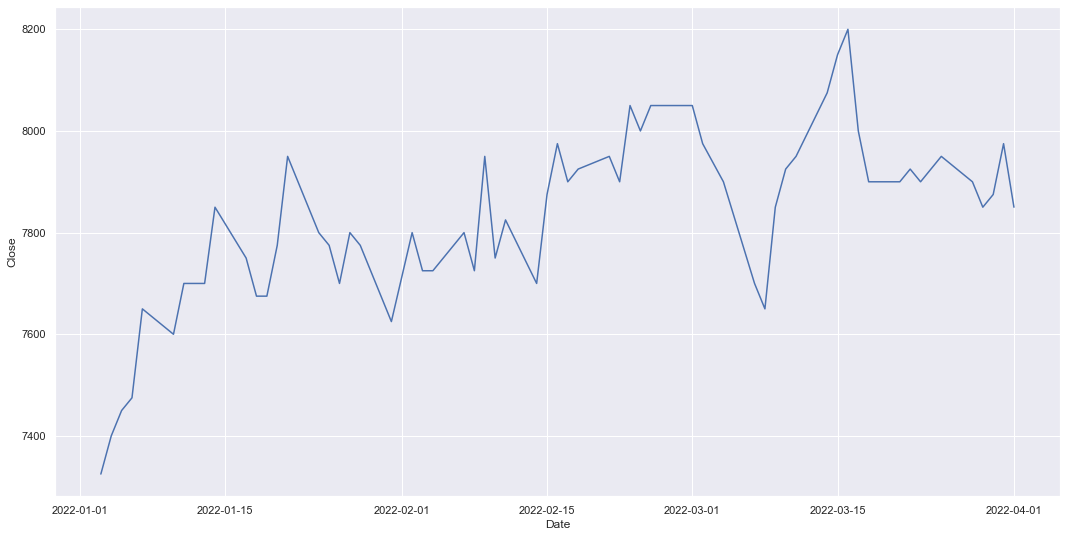

In [10]:
plt.figure(figsize=(18,9))
sns.lineplot(data=new_df, x='Date',y='Close')
sns.set_theme()

In [9]:
# grafik saham sebelum interpolasi

fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=new_df['Date'],
                              open=new_df['Open'],
                              high=new_df['High'],
                              low=new_df['Low'],
                              close=new_df['Close'],
                             ))
fig3.update_layout(title_text='BBCA Stock Price January - April 2022',font=dict(size=12),
                 xaxis_title_text="Tanggal", yaxis_title_text="Stock Price")

dari candlestick diatas, terdapat pola pada data yang kosong, yaitu data kosong setelah 5 hari, kemungkinan data kosong pada weekend (sabtu,minggu)

# Interpolasi (pengisian data null pada stock price)

In [6]:
data_saham = new_df.copy()
data_saham = data_saham.interpolate(method ='linear', limit_direction ='backward')
data_saham

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,7325.0,7400.0,7300.0,7325.0,7214.434082,54287400.0
1,2022-01-02,7325.0,7400.0,7300.0,7325.0,7214.434082,54287400.0
2,2022-01-03,7325.0,7400.0,7300.0,7325.0,7214.434082,54287400.0
3,2022-01-04,7325.0,7450.0,7325.0,7400.0,7288.301758,70624000.0
4,2022-01-05,7450.0,7525.0,7375.0,7450.0,7337.547363,76164900.0
...,...,...,...,...,...,...,...
86,2022-03-28,7825.0,7900.0,7800.0,7900.0,7900.000000,83911500.0
87,2022-03-29,7875.0,7900.0,7825.0,7850.0,7850.000000,62180600.0
88,2022-03-30,7900.0,7900.0,7825.0,7875.0,7875.000000,71430600.0
89,2022-03-31,7925.0,8000.0,7875.0,7975.0,7975.000000,112691900.0


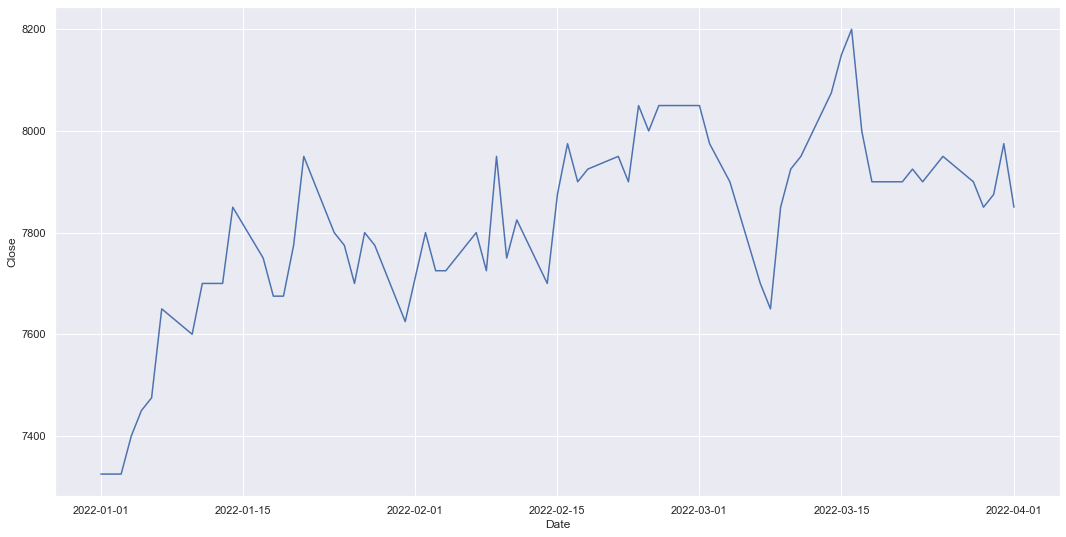

In [9]:
plt.figure(figsize=(18,9))
sns.lineplot(data=data_saham, x='Date',y='Close')
sns.set_theme()

In [9]:
data_saham.to_csv('bca_full.csv', index=False)

In [14]:
data_saham = pd.read_csv('data/bca_full.csv')
data_saham['Date'] = pd.to_datetime(data_saham['Date'])
data_saham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       91 non-null     datetime64[ns]
 1   Open       91 non-null     float64       
 2   High       91 non-null     float64       
 3   Low        91 non-null     float64       
 4   Close      91 non-null     float64       
 5   Adj Close  91 non-null     float64       
 6   Volume     91 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 5.1 KB


In [15]:
# grafik saham sebelum interpolasi

fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=data_saham['Date'],
                              open=data_saham['Open'],
                              high=data_saham['High'],
                              low=data_saham['Low'],
                              close=data_saham['Close'],
                             ))
fig3.update_layout(title_text='BBCA Stock Price January - April 2022',font=dict(size=12),
                 xaxis_title_text="Tanggal", yaxis_title_text="Stock Price")

In [167]:
# label close
label = [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1,0,1,0,0,0,0,0,1,0,
         0,0,1,1,0,1,0,1,1,1,0,1,1,1,0,0,1,1,0,1,0,1,1,1,1,1,
        0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,0,0,1,0]
len(label)

91

In [19]:
# label adj close
label = [
    0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,
    0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
]
len(label)

91

# Arima

In [7]:
model_train = data_saham.iloc[:int(data_saham.shape[0]*0.90)]
valid = data_saham.iloc[int(data_saham.shape[0]*0.90):]
y_pred = valid.copy()

In [8]:
model_scores_r2=[]
model_scores_mse=[]
model_scores_rmse=[]
model_scores_mae=[]
model_scores_rmsle=[]
model_arima = auto_arima(model_train["Close"],trace=True, error_action='ignore',d=0, start_p=1,start_q=1,max_p=5,max_q=5,
                        suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Close"])

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1683.973, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=951.937, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=953.920, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=955.430, Time=0.16 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=957.354, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=957.877, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
prediction_arima = model_arima.predict(len(valid))
y_pred["close_pred"] = prediction_arima
r2_arima = r2_score(y_pred["Close"],y_pred["close_pred"])
mse_arima = mean_squared_error(y_pred["Close"],y_pred["close_pred"])
rmse_arima = np.sqrt(mean_squared_error(y_pred["Close"],y_pred["close_pred"]))
mae_arima=mean_absolute_error(y_pred["Close"],y_pred["close_pred"])
rmsle_arima = np.sqrt(mean_squared_log_error(y_pred["Close"],y_pred["close_pred"]))
model_scores_r2.append(r2_arima)
model_scores_mse.append(mse_arima)
model_scores_rmse.append(rmse_arima)
model_scores_mae.append(mae_arima)
model_scores_rmsle.append(rmsle_arima)
print("R Square Score ARIMA: ",r2_arima)
print("Mean Square Error ARIMA: ",mse_arima)
print("Root Mean Square Error ARIMA: ",rmse_arima)
print("Mean Absoulute Error ARIMA: ",mae_arima)
print("Root Mean Squared Logarithmic Error ARIMA: ", rmsle_arima)

R Square Score ARIMA:  -0.10864563813486439
Mean Square Error ARIMA:  1685.2953485258447
Root Mean Square Error ARIMA:  41.05234887952022
Mean Absoulute Error ARIMA:  33.13912983511782
Root Mean Squared Logarithmic Error ARIMA:  0.005194585164235972


In [10]:
fig4=go.Figure()
fig4.add_trace(go.Scatter(x=model_train.index, y=model_train["Close"], mode='lines',name="Train Data"))
fig4.add_trace(go.Scatter(x=valid.index, y=valid["Close"], mode='lines',name="Validation",))
fig4.add_trace(go.Scatter(x=valid.index, y=y_pred["close_pred"], mode='lines',name="Prediction",))
fig4.update_layout(title="ARIMA - Close",xaxis_title="Date",yaxis_title="Close",legend=dict(x=0,y=1,traceorder="normal"),font=dict(size=12))
fig4.show()

In [16]:
data_saham.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,7325.0,7400.0,7300.0,7325.0,7214.434082,54287400.0
1,2022-01-02,7325.0,7400.0,7300.0,7325.0,7214.434082,54287400.0
2,2022-01-03,7325.0,7400.0,7300.0,7325.0,7214.434082,54287400.0
3,2022-01-04,7325.0,7450.0,7325.0,7400.0,7288.301758,70624000.0
4,2022-01-05,7450.0,7525.0,7375.0,7450.0,7337.547363,76164900.0


For numeric stock prices, the features used are open, high, low and close.

In [96]:
feature = data_saham.iloc[:,:5]
feature

,Date,Open,High,Low,Close
0,2022-01-01,7325.0,7400.0,7300.0,7325.0
1,2022-01-02,7325.0,7400.0,7300.0,7325.0
2,2022-01-03,7325.0,7400.0,7300.0,7325.0
3,2022-01-04,7325.0,7450.0,7325.0,7400.0
4,2022-01-05,7450.0,7525.0,7375.0,7450.0
...,...,...,...,...,...
86,2022-03-28,7825.0,7900.0,7800.0,7900.0
87,2022-03-29,7875.0,7900.0,7825.0,7850.0
88,2022-03-30,7900.0,7900.0,7825.0,7875.0
89,2022-03-31,7925.0,8000.0,7875.0,7975.0


The first step, discretizes numeric values by converting all numeric attributes into discrete values to be positive, negative or equal [19]. This is performed by comparing all numeric values for each attribute with previous closing price value. After comparison, if the value of the attribute is greater than the previous closing price value, then this attribute value will be replaced with ―positive‖, if the attribute value is less than the previous closing price value it will be replaced with ―negative‖. 

In [8]:
feature.head()

,Date,Open,High,Low,Close
0,2022-01-01,7325.0,7400.0,7300.0,7325.0
1,2022-01-02,7325.0,7400.0,7300.0,7325.0
2,2022-01-03,7325.0,7400.0,7300.0,7325.0
3,2022-01-04,7325.0,7450.0,7325.0,7400.0
4,2022-01-05,7450.0,7525.0,7375.0,7450.0


In [97]:
def discretize_value(value,idx):
    if value > feature.iloc[idx-1,4]:
        return 'Positive'
    elif value < feature.iloc[idx-1,4]:
        return 'Negative'
    else:
        return 'Equal'

for x in range(1,91):
    feature.iloc[x,1] = discretize_value(feature.iloc[x,1],x)
    feature.iloc[x,2] = discretize_value(feature.iloc[x,2],x)
    feature.iloc[x,3] = discretize_value(feature.iloc[x,3],x)
feature

,Date,Open,High,Low,Close
0,2022-01-01,7325.0,7400.0,7300.0,7325.0
1,2022-01-02,Equal,Positive,Negative,7325.0
2,2022-01-03,Equal,Positive,Negative,7325.0
3,2022-01-04,Equal,Positive,Equal,7400.0
4,2022-01-05,Positive,Positive,Negative,7450.0
...,...,...,...,...,...
86,2022-03-28,Negative,Negative,Negative,7900.0
87,2022-03-29,Negative,Equal,Negative,7850.0
88,2022-03-30,Positive,Positive,Negative,7875.0
89,2022-03-31,Positive,Positive,Equal,7975.0


In [94]:
# hari terakhir desember 2021 close = 7300.0

In [98]:
# Index 0 dibuat equal
feature.iloc[0,1] = 'Positive'
feature.iloc[0,2] = 'Positive'
feature.iloc[0,3] = 'Equal'
feature

,Date,Open,High,Low,Close
0,2022-01-01,Positive,Positive,Equal,7325.0
1,2022-01-02,Equal,Positive,Negative,7325.0
2,2022-01-03,Equal,Positive,Negative,7325.0
3,2022-01-04,Equal,Positive,Equal,7400.0
4,2022-01-05,Positive,Positive,Negative,7450.0
...,...,...,...,...,...
86,2022-03-28,Negative,Negative,Negative,7900.0
87,2022-03-29,Negative,Equal,Negative,7850.0
88,2022-03-30,Positive,Positive,Negative,7875.0
89,2022-03-31,Positive,Positive,Equal,7975.0


### Labelling "raise" or "fall"

In [99]:
def label_close(value,idx):
    if value >= feature.iloc[idx-1,4]:
        return 1
    elif value < feature.iloc[idx-1,4]:
        return 0

# hari terakhir desember 2021 close = 7300.0
label_stock = [1]
for x in range(1,91):
    label_stock.append(label_close(feature.iloc[x,4],x))
feature['label'] = label_stock
feature

,Date,Open,High,Low,Close,label
0,2022-01-01,Positive,Positive,Equal,7325.0,1
1,2022-01-02,Equal,Positive,Negative,7325.0,1
2,2022-01-03,Equal,Positive,Negative,7325.0,1
3,2022-01-04,Equal,Positive,Equal,7400.0,1
4,2022-01-05,Positive,Positive,Negative,7450.0,1
...,...,...,...,...,...,...
86,2022-03-28,Negative,Negative,Negative,7900.0,0
87,2022-03-29,Negative,Equal,Negative,7850.0,0
88,2022-03-30,Positive,Positive,Negative,7875.0,1
89,2022-03-31,Positive,Positive,Equal,7975.0,1


In [100]:
feature['label'].value_counts()

1    51
0    40
Name: label, dtype: int64

Data numerik sudah di process, perlu digabungkan dengan data sentimen

# Modelling Stock Movement

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

In [101]:
sentimen_data = pd.read_csv('data/sentimen_full.csv')
sentimen_data['Datetime'] = pd.to_datetime(sentimen_data['Datetime'])
sentimen_data.rename(columns={'Datetime':'Date'}, inplace=True)
sentimen_data

,Date,sentimen_score,sentimen
0,2022-01-01,-1.0,0.0
1,2022-01-02,1.0,1.0
2,2022-01-03,0.0,1.0
3,2022-01-04,0.0,1.0
4,2022-01-05,1.0,1.0
...,...,...,...
86,2022-03-28,4.0,1.0
87,2022-03-29,4.0,1.0
88,2022-03-30,-2.0,0.0
89,2022-03-31,-6.0,0.0


In [102]:
sentimen_data.sentimen.value_counts()

1.0    51
0.0    40
Name: sentimen, dtype: int64

In [103]:
new_df = sentimen_data[['Date','sentimen']].merge(feature, on=['Date'], how='right')
new_df

,Date,sentimen,Open,High,Low,Close,label
0,2022-01-01,0.0,Positive,Positive,Equal,7325.0,1
1,2022-01-02,1.0,Equal,Positive,Negative,7325.0,1
2,2022-01-03,1.0,Equal,Positive,Negative,7325.0,1
3,2022-01-04,1.0,Equal,Positive,Equal,7400.0,1
4,2022-01-05,1.0,Positive,Positive,Negative,7450.0,1
...,...,...,...,...,...,...,...
86,2022-03-28,1.0,Negative,Negative,Negative,7900.0,0
87,2022-03-29,1.0,Negative,Equal,Negative,7850.0,0
88,2022-03-30,0.0,Positive,Positive,Negative,7875.0,1
89,2022-03-31,0.0,Positive,Positive,Equal,7975.0,1


## Encode

In [104]:
# Cara 2 untuk one hot encoder

from sklearn.preprocessing import OneHotEncoder

# Membuat Object OneHotEncoder dengan kategori yang disesuaikan dengan isi unique dari kolom
# lalu object digunakan untuk fit kemudian transform
ohe = OneHotEncoder(categories=[list(new_df.Open.unique())], handle_unknown='ignore', sparse=False)
y = np.array(new_df['Open']).reshape(-1,1)
ohe.fit(y)
y_transform = ohe.transform(y)

# Membuat kolom baru untuk menampung hasil encoding 
new_df[[ f'open_{opn}' for opn in new_df.Open.unique() ]] = y_transform
new_df.head()

,Date,sentimen,Open,High,Low,Close,label,open_Positive,open_Equal,open_Negative
0,2022-01-01,0.0,Positive,Positive,Equal,7325.0,1,1.0,0.0,0.0
1,2022-01-02,1.0,Equal,Positive,Negative,7325.0,1,0.0,1.0,0.0
2,2022-01-03,1.0,Equal,Positive,Negative,7325.0,1,0.0,1.0,0.0
3,2022-01-04,1.0,Equal,Positive,Equal,7400.0,1,0.0,1.0,0.0
4,2022-01-05,1.0,Positive,Positive,Negative,7450.0,1,1.0,0.0,0.0


In [105]:
# Cara 2 untuk one hot encoder

from sklearn.preprocessing import OneHotEncoder

# Membuat Object OneHotEncoder dengan kategori yang disesuaikan dengan isi unique dari kolom
# lalu object digunakan untuk fit kemudian transform
ohe = OneHotEncoder(categories=[list(new_df.High.unique())], handle_unknown='ignore', sparse=False)
y = np.array(new_df['High']).reshape(-1,1)
ohe.fit(y)
y_transform = ohe.transform(y)

# Membuat kolom baru untuk menampung hasil encoding 
new_df[[ f'high_{high}' for high in new_df.High.unique() ]] = y_transform
new_df.head()

,Date,sentimen,Open,High,Low,Close,label,open_Positive,open_Equal,open_Negative,high_Positive,high_Equal,high_Negative
0,2022-01-01,0.0,Positive,Positive,Equal,7325.0,1,1.0,0.0,0.0,1.0,0.0,0.0
1,2022-01-02,1.0,Equal,Positive,Negative,7325.0,1,0.0,1.0,0.0,1.0,0.0,0.0
2,2022-01-03,1.0,Equal,Positive,Negative,7325.0,1,0.0,1.0,0.0,1.0,0.0,0.0
3,2022-01-04,1.0,Equal,Positive,Equal,7400.0,1,0.0,1.0,0.0,1.0,0.0,0.0
4,2022-01-05,1.0,Positive,Positive,Negative,7450.0,1,1.0,0.0,0.0,1.0,0.0,0.0


In [106]:
# Cara 2 untuk one hot encoder

from sklearn.preprocessing import OneHotEncoder

# Membuat Object OneHotEncoder dengan kategori yang disesuaikan dengan isi unique dari kolom
# lalu object digunakan untuk fit kemudian transform
ohe = OneHotEncoder(categories=[list(new_df.Low.unique())], handle_unknown='ignore', sparse=False)
y = np.array(new_df['Low']).reshape(-1,1)
ohe.fit(y)
y_transform = ohe.transform(y)

# Membuat kolom baru untuk menampung hasil encoding 
new_df[[ f'low_{low}' for low in new_df.Low.unique() ]] = y_transform
new_df.head()

,Date,sentimen,Open,High,Low,Close,label,open_Positive,open_Equal,open_Negative,high_Positive,high_Equal,high_Negative,low_Equal,low_Negative,low_Positive
0,2022-01-01,0.0,Positive,Positive,Equal,7325.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2022-01-02,1.0,Equal,Positive,Negative,7325.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2022-01-03,1.0,Equal,Positive,Negative,7325.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2022-01-04,1.0,Equal,Positive,Equal,7400.0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2022-01-05,1.0,Positive,Positive,Negative,7450.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [107]:
new_df.drop(columns=['Open','High','Low'], inplace=True)
new_df.head()

,Date,sentimen,Close,label,open_Positive,open_Equal,open_Negative,high_Positive,high_Equal,high_Negative,low_Equal,low_Negative,low_Positive
0,2022-01-01,0.0,7325.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2022-01-02,1.0,7325.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2022-01-03,1.0,7325.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2022-01-04,1.0,7400.0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2022-01-05,1.0,7450.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Ordinal Encoding

In [97]:
#Label encoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder( categories=[['Negative','Equal','Positive']] )

#ubah dulu sebagai array
cols = ['Open','High','Low']
for col in cols:
    y = np.array(new_df[col]).reshape(-1,1)
    ordinal_encoder.fit(y)
    new_df[col] = ordinal_encoder.transform(y)
new_df.head()

,Date,sentimen,Open,High,Low,Close,label
0,2022-01-01,0.0,1.0,1.0,1.0,7325.0,0
1,2022-01-02,1.0,1.0,2.0,0.0,7325.0,1
2,2022-01-03,1.0,1.0,2.0,0.0,7325.0,1
3,2022-01-04,1.0,1.0,2.0,1.0,7400.0,1
4,2022-01-05,1.0,2.0,2.0,0.0,7450.0,1


In [169]:
# #Label encoder
# from sklearn.preprocessing import OrdinalEncoder

# ordinal_encoder = OrdinalEncoder( categories=[['Fall','Raise']] )

# #ubah dulu sebagai array
# y = np.array(new_df['label']).reshape(-1,1)
# ordinal_encoder.fit(y)
# new_df['State'] = ordinal_encoder.transform(y)
# new_df.head()

,Date,sentimen,Open,High,Low,Close,label,State
0,2022-01-01,0.0,Equal,Equal,Equal,7325.0,Fall,0.0
1,2022-01-02,1.0,Equal,Positive,Negative,7325.0,Raise,1.0
2,2022-01-03,1.0,Equal,Positive,Negative,7325.0,Raise,1.0
3,2022-01-04,1.0,Equal,Positive,Equal,7400.0,Raise,1.0
4,2022-01-05,1.0,Positive,Positive,Negative,7450.0,Raise,1.0


In [108]:
new_df

,Date,sentimen,Close,label,open_Positive,open_Equal,open_Negative,high_Positive,high_Equal,high_Negative,low_Equal,low_Negative,low_Positive
0,2022-01-01,0.0,7325.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2022-01-02,1.0,7325.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2022-01-03,1.0,7325.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2022-01-04,1.0,7400.0,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2022-01-05,1.0,7450.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2022-03-28,1.0,7900.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
87,2022-03-29,1.0,7850.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
88,2022-03-30,0.0,7875.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
89,2022-03-31,0.0,7975.0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [123]:
X = new_df.drop(columns=['Date','label'])
y = new_df['label']
X

,sentimen,open_Positive,open_Equal,open_Negative,high_Positive,high_Equal,high_Negative,low_Equal,low_Negative,low_Positive
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
86,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
87,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
88,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
89,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=False)

In [125]:
X_train.columns

Index(['sentimen', 'open_Positive', 'open_Equal', 'open_Negative',
       'high_Positive', 'high_Equal', 'high_Negative', 'low_Equal',
       'low_Negative', 'low_Positive'],
      dtype='object')

## Scaling

In [76]:
# standard scaler all columns
# fit scaler to train data only

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
scaler = StandardScaler()
# y = np.array(df_encode['Balance']).reshape(-1,1)
columns = list(X_train.columns)
scaler.fit(X_train[columns])

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train[columns] = X_train_scaled
X_test[columns] = X_test_scaled

<ipython-input-76-4eb0ea771d66>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-4eb0ea771d66>:14: SettingWithCopyWarning:


A

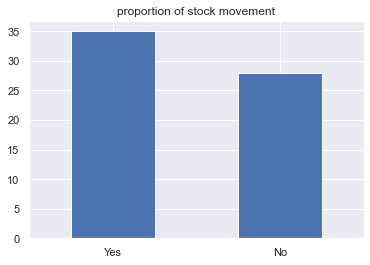

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

y_train.value_counts().plot(kind='bar')
plt.xticks([0,1],['Yes','No'], rotation=0)
plt.title('proportion of stock movement')
sns.set_theme()

In [23]:
# sm = SMOTE(sampling_strategy = 1)
# X_smote, y_smote = sm.fit_resample(X_train, y_train)

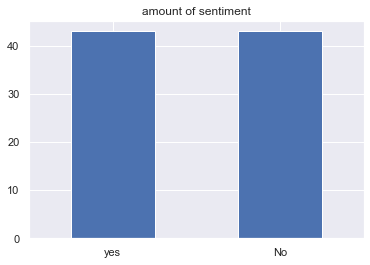

In [181]:
# y_smote.value_counts().plot(kind='bar')
# plt.xticks([0,1],['yes','No'], rotation=0)
# plt.title('amount of sentiment')
# sns.set_theme()

# Model from One Hot Encoding 

## SVM

In [136]:
svm = SVC(C=1,kernel='linear')
svm = svm.fit(X_train, y_train)

y_predict = svm.predict(X_test)

print('SVM : ', accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print()
print(classification_report(y_test,y_predict))

SVM :  0.6842105263157895
[[6 2]
 [4 7]]

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.78      0.64      0.70        11

    accuracy                           0.68        19
   macro avg       0.69      0.69      0.68        19
weighted avg       0.70      0.68      0.69        19



## KNN

In [212]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print('KNN : ', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

KNN :  0.7894736842105263
[[7 1]
 [3 8]]

              precision    recall  f1-score   support

        Fall       0.70      0.88      0.78         8
       Raise       0.89      0.73      0.80        11

    accuracy                           0.79        19
   macro avg       0.79      0.80      0.79        19
weighted avg       0.81      0.79      0.79        19



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [38]:
import pickle

# Load Model gabungan
filename = 'pickles/movement_model_knn78.sav'
knn = pickle.load(open(filename, 'rb'))

In [40]:
knn.classes_

array(['Fall', 'Raise'], dtype=object)

In [58]:
y_pred = knn.predict(X_test)

print('KNN : ', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

KNN :  0.7368421052631579
[[7 1]
 [4 7]]

              precision    recall  f1-score   support

        Fall       0.64      0.88      0.74         8
       Raise       0.88      0.64      0.74        11

    accuracy                           0.74        19
   macro avg       0.76      0.76      0.74        19
weighted avg       0.77      0.74      0.74        19



In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print('KNN : ', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

KNN :  0.7142857142857143
[[11  1]
 [ 7  9]]

              precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.90      0.56      0.69        16

    accuracy                           0.71        28
   macro avg       0.76      0.74      0.71        28
weighted avg       0.78      0.71      0.71        28



In [49]:
import pickle

# Save the trained model as a pickle string.
filename = 'pickles/movement_model_knn71.sav'
pickle.dump(knn, open(filename, 'wb'))

# Model from Ordinal Encoding

In [53]:
svm = SVC(C=4,kernel='linear')
svm = svm.fit(X_train, y_train)

y_predict = svm.predict(X_test)

print('SVM : ', accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print()
print(classification_report(y_test,y_predict))

SVM :  0.5789473684210527
[[ 1  8]
 [ 0 10]]

              precision    recall  f1-score   support

         0.0       1.00      0.11      0.20         9
         1.0       0.56      1.00      0.71        10

    accuracy                           0.58        19
   macro avg       0.78      0.56      0.46        19
weighted avg       0.77      0.58      0.47        19



In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print('KNN : ', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

KNN :  0.7368421052631579
[[6 3]
 [2 8]]

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71         9
         1.0       0.73      0.80      0.76        10

    accuracy                           0.74        19
   macro avg       0.74      0.73      0.73        19
weighted avg       0.74      0.74      0.74        19



Hasil ketika hanya menggunakan sentimen atribut : 52%

#########################

hasil modelling data dengan one hot encoding (tanpa scaling):
- knn = 78% ( n=4 )
- svm = 78%, recall 50% ( C=2 linear )

hasil modelling data dengan one hot encoding (dengan random_state=123):
- knn = 78% ( n=6 )
- svm = 63% ( C=3 linear )

hasil modelling data dengan one hot encoding (dg scaling):
- knn = 68%
- svm = 68% n=3

hasil modelling data dengan ordinal encoding (std scaler):
- knn = 68%
- svm = 73% ( C=1, linear )

hasil modelling data dengan ordinal encoding (mimmax scaler):
- knn = 73% n=7
- svm = 57%

prediksi Menggunakan data close lebih baik dari pada adj close, cari referensi lagi untuk menentukan metode dan feature yang digunakan

to do list :
- cari data baru untuk testing, tanggal 2-11 april
- lakukan testing

## Testing

In [11]:
data_test = pd.read_csv('data/BBCA.JK Test.csv')
data_test['Date'] = pd.to_datetime(data_test['Date'])
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,7325.0,7400.0,7300.0,7325.0,7214.434082,54287400
1,2022-01-04,7325.0,7450.0,7325.0,7400.0,7288.301758,70624000
2,2022-01-05,7450.0,7525.0,7375.0,7450.0,7337.547363,76164900
3,2022-01-06,7500.0,7525.0,7425.0,7475.0,7362.169922,63657100
4,2022-01-07,7550.0,7700.0,7500.0,7650.0,7534.528320,143433300
...,...,...,...,...,...,...,...
66,2022-04-08,7800.0,7875.0,7775.0,7850.0,7850.000000,69791600
67,2022-04-11,7825.0,7875.0,7725.0,7725.0,7725.000000,62776200
68,2022-04-12,7725.0,7800.0,7700.0,7800.0,7800.000000,73471300
69,2022-04-13,7800.0,7850.0,7750.0,7800.0,7800.000000,57622100


In [21]:
df_date = pd.DataFrame({
    'Date' : pd.date_range(start="2022-04-02",periods=13)
})
df_date

,Date
0,2022-04-02
1,2022-04-03
2,2022-04-04
3,2022-04-05
4,2022-04-06
5,2022-04-07
6,2022-04-08
7,2022-04-09
8,2022-04-10
9,2022-04-11


In [22]:
new_df = data_test.merge(df_date, on=['Date'], how='right')
new_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-02,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-04-03,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-04-04,7925.0,7925.0,7825.0,7900.0,7900.0,57321200.0
3,2022-04-05,7900.0,7900.0,7850.0,7900.0,7900.0,48528300.0
4,2022-04-06,7825.0,7850.0,7750.0,7750.0,7750.0,119263000.0
5,2022-04-07,7725.0,7825.0,7700.0,7750.0,7750.0,68619400.0
6,2022-04-08,7800.0,7875.0,7775.0,7850.0,7850.0,69791600.0
7,2022-04-09,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-04-10,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-04-11,7825.0,7875.0,7725.0,7725.0,7725.0,62776200.0


In [23]:
saham_test = new_df.copy()
saham_test = saham_test.interpolate(method ='linear', limit_direction ='backward')
saham_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-02,7925.000000,7925.0,7825.000000,7900.000000,7900.000000,5.732120e+07
1,2022-04-03,7925.000000,7925.0,7825.000000,7900.000000,7900.000000,5.732120e+07
2,2022-04-04,7925.000000,7925.0,7825.000000,7900.000000,7900.000000,5.732120e+07
3,2022-04-05,7900.000000,7900.0,7850.000000,7900.000000,7900.000000,4.852830e+07
4,2022-04-06,7825.000000,7850.0,7750.000000,7750.000000,7750.000000,1.192630e+08
5,2022-04-07,7725.000000,7825.0,7700.000000,7750.000000,7750.000000,6.861940e+07
6,2022-04-08,7800.000000,7875.0,7775.000000,7850.000000,7850.000000,6.979160e+07
7,2022-04-09,7808.333333,7875.0,7758.333333,7808.333333,7808.333333,6.745313e+07
8,2022-04-10,7816.666667,7875.0,7741.666667,7766.666667,7766.666667,6.511467e+07
9,2022-04-11,7825.000000,7875.0,7725.000000,7725.000000,7725.000000,6.277620e+07


In [30]:
feature_test = saham_test.iloc[:,:5]
feature_test

,Date,Open,High,Low,Close
0,2022-04-02,7925.000000,7925.0,7825.000000,7900.000000
1,2022-04-03,7925.000000,7925.0,7825.000000,7900.000000
2,2022-04-04,7925.000000,7925.0,7825.000000,7900.000000
3,2022-04-05,7900.000000,7900.0,7850.000000,7900.000000
4,2022-04-06,7825.000000,7850.0,7750.000000,7750.000000
5,2022-04-07,7725.000000,7825.0,7700.000000,7750.000000
6,2022-04-08,7800.000000,7875.0,7775.000000,7850.000000
7,2022-04-09,7808.333333,7875.0,7758.333333,7808.333333
8,2022-04-10,7816.666667,7875.0,7741.666667,7766.666667
9,2022-04-11,7825.000000,7875.0,7725.000000,7725.000000


## Discretize

In [31]:
def discretize_value(value,idx):
    if value > feature_test.iloc[idx-1,4]:
        return 'Positive'
    elif value < feature_test.iloc[idx-1,4]:
        return 'Negative'
    else:
        return 'Equal'

for x in range(1,13):
    feature_test.iloc[x,1] = discretize_value(feature_test.iloc[x,1],x)
    feature_test.iloc[x,2] = discretize_value(feature_test.iloc[x,2],x)
    feature_test.iloc[x,3] = discretize_value(feature_test.iloc[x,3],x)
feature_test

,Date,Open,High,Low,Close
0,2022-04-02,7925.0,7925.0,7825.0,7900.000000
1,2022-04-03,Positive,Positive,Negative,7900.000000
2,2022-04-04,Positive,Positive,Negative,7900.000000
3,2022-04-05,Equal,Equal,Negative,7900.000000
4,2022-04-06,Negative,Negative,Negative,7750.000000
5,2022-04-07,Negative,Positive,Negative,7750.000000
6,2022-04-08,Positive,Positive,Positive,7850.000000
7,2022-04-09,Negative,Positive,Negative,7808.333333
8,2022-04-10,Positive,Positive,Negative,7766.666667
9,2022-04-11,Positive,Positive,Negative,7725.000000


In [32]:
feature_test.iloc[0,1:4] = 'Equal'
feature_test

,Date,Open,High,Low,Close
0,2022-04-02,Equal,Equal,Equal,7900.000000
1,2022-04-03,Positive,Positive,Negative,7900.000000
2,2022-04-04,Positive,Positive,Negative,7900.000000
3,2022-04-05,Equal,Equal,Negative,7900.000000
4,2022-04-06,Negative,Negative,Negative,7750.000000
5,2022-04-07,Negative,Positive,Negative,7750.000000
6,2022-04-08,Positive,Positive,Positive,7850.000000
7,2022-04-09,Negative,Positive,Negative,7808.333333
8,2022-04-10,Positive,Positive,Negative,7766.666667
9,2022-04-11,Positive,Positive,Negative,7725.000000


## Labelling Test data

In [33]:
def label_close(value,idx):
    if value >= feature_test.iloc[idx-1,4]:
        return 1
    elif value < feature_test.iloc[idx-1,4]:
        return 0

label_stock = [0] # Pertama dibuat Fall
for x in range(1,13):
    label_stock.append(label_close(feature_test.iloc[x,4],x))
feature_test['label'] = label_stock
feature_test

,Date,Open,High,Low,Close,label
0,2022-04-02,Equal,Equal,Equal,7900.000000,0
1,2022-04-03,Positive,Positive,Negative,7900.000000,1
2,2022-04-04,Positive,Positive,Negative,7900.000000,1
3,2022-04-05,Equal,Equal,Negative,7900.000000,1
4,2022-04-06,Negative,Negative,Negative,7750.000000,0
5,2022-04-07,Negative,Positive,Negative,7750.000000,1
6,2022-04-08,Positive,Positive,Positive,7850.000000,1
7,2022-04-09,Negative,Positive,Negative,7808.333333,0
8,2022-04-10,Positive,Positive,Negative,7766.666667,0
9,2022-04-11,Positive,Positive,Negative,7725.000000,0


In [34]:
# Cara 2 untuk one hot encoder

from sklearn.preprocessing import OneHotEncoder

# Membuat Object OneHotEncoder dengan kategori yang disesuaikan dengan isi unique dari kolom
# lalu object digunakan untuk fit kemudian transform
ohe = OneHotEncoder(categories=[list(feature_test.Open.unique())], handle_unknown='ignore', sparse=False)
y = np.array(feature_test['Open']).reshape(-1,1)
ohe.fit(y)
y_transform = ohe.transform(y)

# Membuat kolom baru untuk menampung hasil encoding 
feature_test[[ f'open_{opn}' for opn in feature_test.Open.unique() ]] = y_transform
feature_test.head()

,Date,Open,High,Low,Close,label,open_Equal,open_Positive,open_Negative
0,2022-04-02,Equal,Equal,Equal,7900.0,0,1.0,0.0,0.0
1,2022-04-03,Positive,Positive,Negative,7900.0,1,0.0,1.0,0.0
2,2022-04-04,Positive,Positive,Negative,7900.0,1,0.0,1.0,0.0
3,2022-04-05,Equal,Equal,Negative,7900.0,1,1.0,0.0,0.0
4,2022-04-06,Negative,Negative,Negative,7750.0,0,0.0,0.0,1.0


In [35]:
# Cara 2 untuk one hot encoder

from sklearn.preprocessing import OneHotEncoder

# Membuat Object OneHotEncoder dengan kategori yang disesuaikan dengan isi unique dari kolom
# lalu object digunakan untuk fit kemudian transform
ohe = OneHotEncoder(categories=[list(feature_test.High.unique())], handle_unknown='ignore', sparse=False)
y = np.array(feature_test['High']).reshape(-1,1)
ohe.fit(y)
y_transform = ohe.transform(y)

# Membuat kolom baru untuk menampung hasil encoding 
feature_test[[ f'High_{high}' for high in feature_test.High.unique() ]] = y_transform
feature_test.head()

,Date,Open,High,Low,Close,label,open_Equal,open_Positive,open_Negative,High_Equal,High_Positive,High_Negative
0,2022-04-02,Equal,Equal,Equal,7900.0,0,1.0,0.0,0.0,1.0,0.0,0.0
1,2022-04-03,Positive,Positive,Negative,7900.0,1,0.0,1.0,0.0,0.0,1.0,0.0
2,2022-04-04,Positive,Positive,Negative,7900.0,1,0.0,1.0,0.0,0.0,1.0,0.0
3,2022-04-05,Equal,Equal,Negative,7900.0,1,1.0,0.0,0.0,1.0,0.0,0.0
4,2022-04-06,Negative,Negative,Negative,7750.0,0,0.0,0.0,1.0,0.0,0.0,1.0


In [36]:
# Cara 2 untuk one hot encoder

from sklearn.preprocessing import OneHotEncoder

# Membuat Object OneHotEncoder dengan kategori yang disesuaikan dengan isi unique dari kolom
# lalu object digunakan untuk fit kemudian transform
ohe = OneHotEncoder(categories=[list(feature_test.Low.unique())], handle_unknown='ignore', sparse=False)
y = np.array(feature_test['Low']).reshape(-1,1)
ohe.fit(y)
y_transform = ohe.transform(y)

# Membuat kolom baru untuk menampung hasil encoding 
feature_test[[ f'Low_{low}' for low in feature_test.Low.unique() ]] = y_transform
feature_test.head()

,Date,Open,High,Low,Close,label,open_Equal,open_Positive,open_Negative,High_Equal,High_Positive,High_Negative,Low_Equal,Low_Negative,Low_Positive
0,2022-04-02,Equal,Equal,Equal,7900.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2022-04-03,Positive,Positive,Negative,7900.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2022-04-04,Positive,Positive,Negative,7900.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2022-04-05,Equal,Equal,Negative,7900.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2022-04-06,Negative,Negative,Negative,7750.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [37]:
feature_test.drop(columns=['Open','High','Low'],inplace=True)
# feature_test.drop(columns=['Date'],inplace=True)
feature_test

,Date,Close,label,open_Equal,open_Positive,open_Negative,High_Equal,High_Positive,High_Negative,Low_Equal,Low_Negative,Low_Positive
0,2022-04-02,7900.000000,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2022-04-03,7900.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2022-04-04,7900.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2022-04-05,7900.000000,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2022-04-06,7750.000000,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,2022-04-07,7750.000000,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6,2022-04-08,7850.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,2022-04-09,7808.333333,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,2022-04-10,7766.666667,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,2022-04-11,7725.000000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [38]:
feature_test.to_csv('data/testing_data.csv', index=False)

In [33]:
X = feature_test.drop(columns='label')
y = feature_test.label

In [48]:
feature_test

,Date,Close,label,open_Equal,open_Positive,open_Negative,High_Equal,High_Positive,High_Negative,Low_Equal,Low_Negative,Low_Positive
0,2022-04-02,7900.000000,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2022-04-03,7900.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2022-04-04,7900.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2022-04-05,7900.000000,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2022-04-06,7750.000000,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,2022-04-07,7750.000000,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6,2022-04-08,7850.000000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,2022-04-09,7808.333333,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,2022-04-10,7766.666667,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,2022-04-11,7725.000000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
